<a href="https://colab.research.google.com/github/adrita23/Clustering_geographic_data/blob/main/ML_Exam3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import data
data = pd.read_csv('/content/drive/MyDrive/ML HW/exam3data.csv')

In [3]:
longitude_data = data['Longitude']
latitude_data = data['Latitude']
country  = data['name']

In [4]:
data.head(5)

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


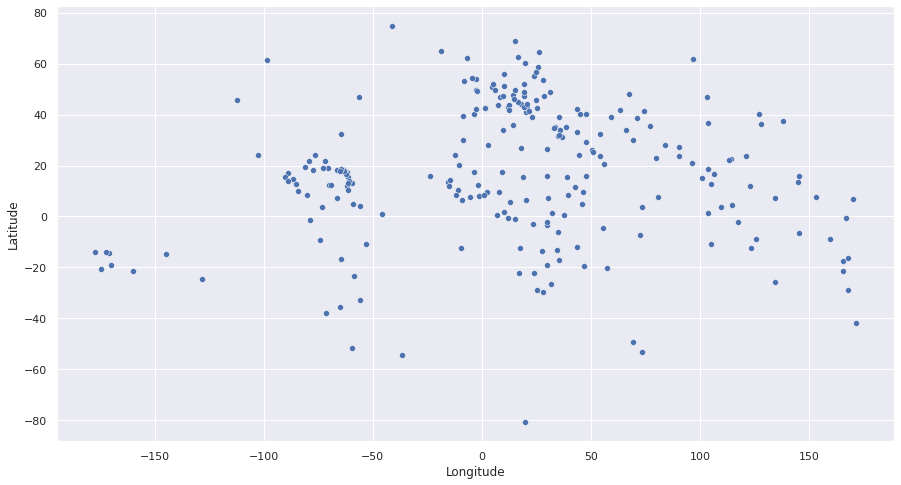

In [5]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(longitude_data, latitude_data, x = data.columns[1], y = data.columns[2])

**Ans to Ques. 1:** A 2D scatter plot is shown in the above where the x-axis represents longitude (range from -180 to 180 degrees) and the y-axis represents latitude (range from -90 to +90 degrees). Each dot represnts a country. As we can see, the data distribution follows some pattern as the density is high to some places and based on that pattern, clusters can be formed. But the plot does not clearly show how many clusters we need, it needs to be investigated.

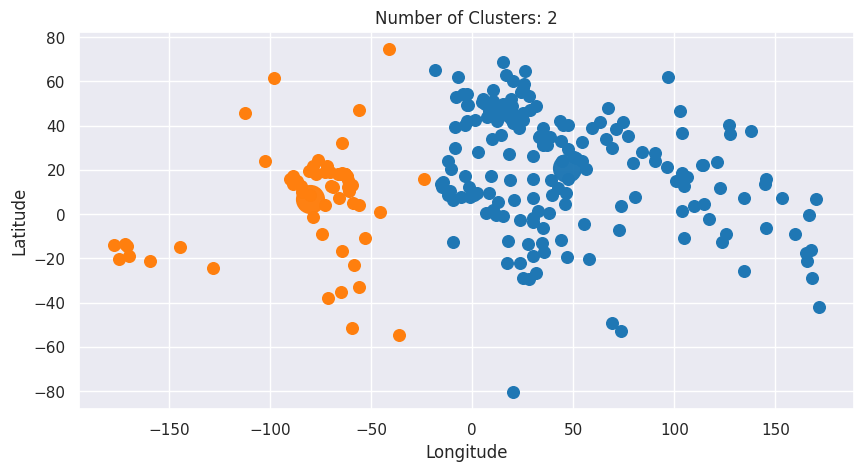

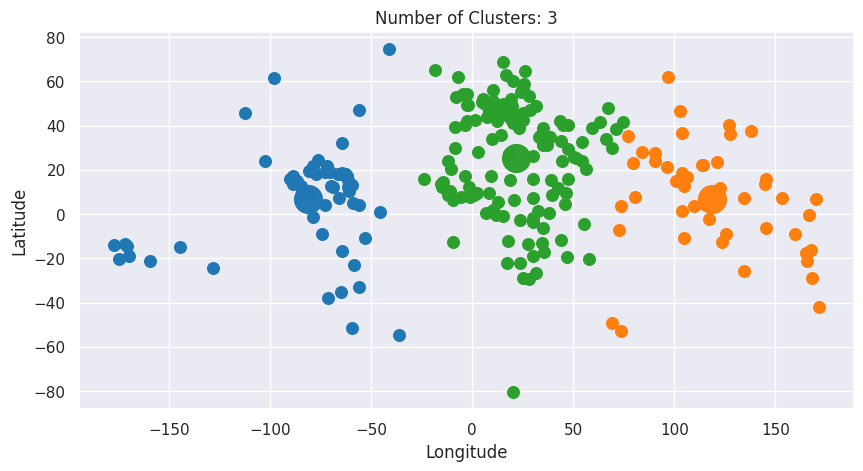

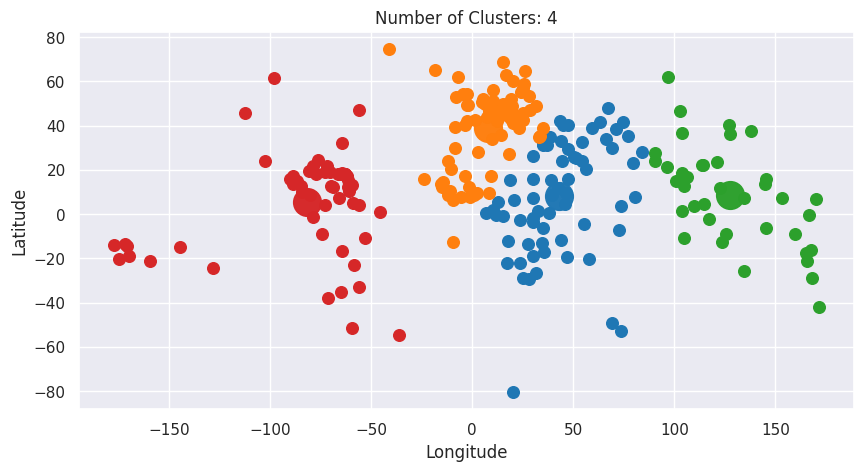

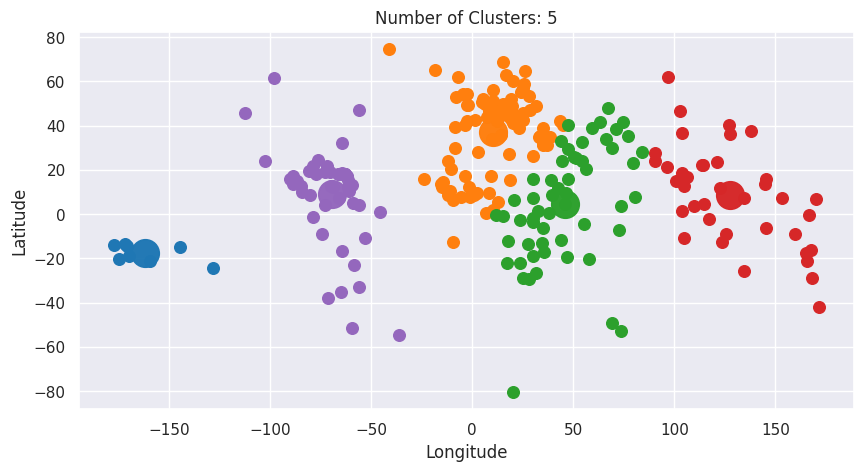

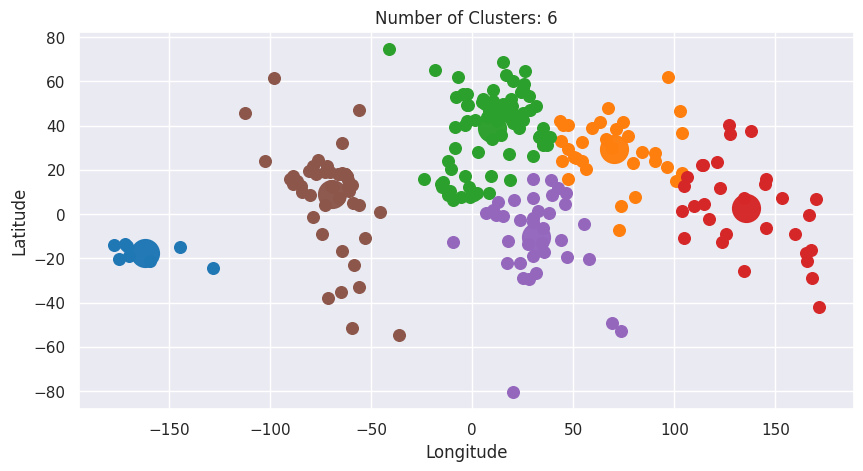

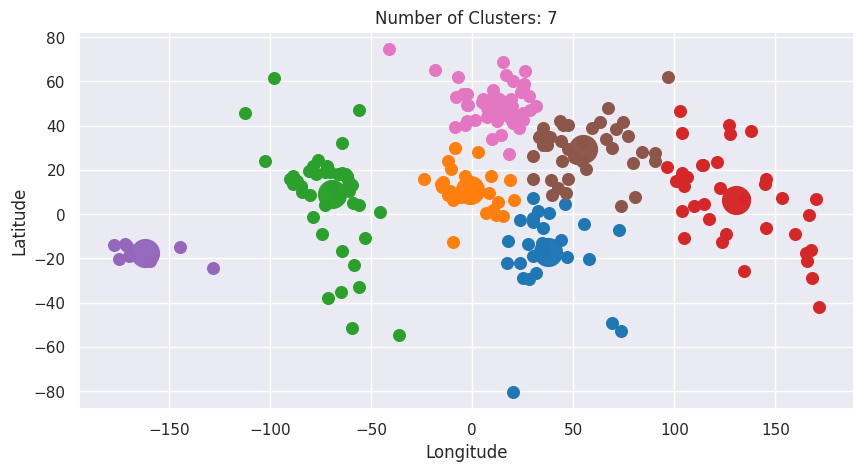

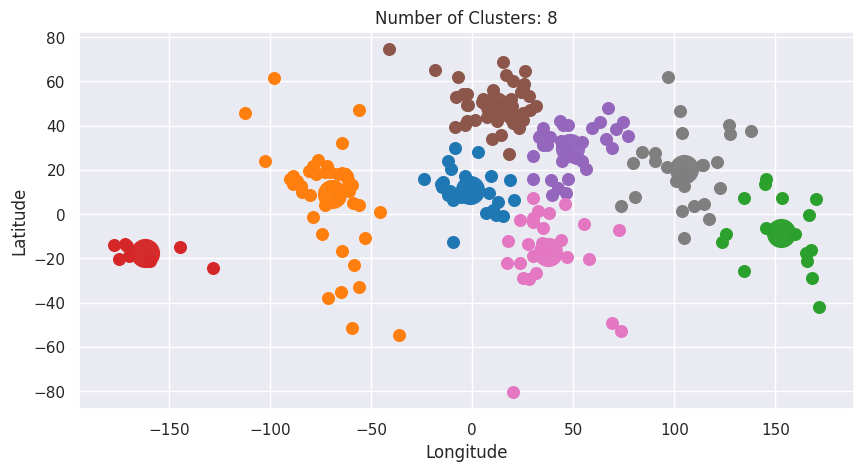

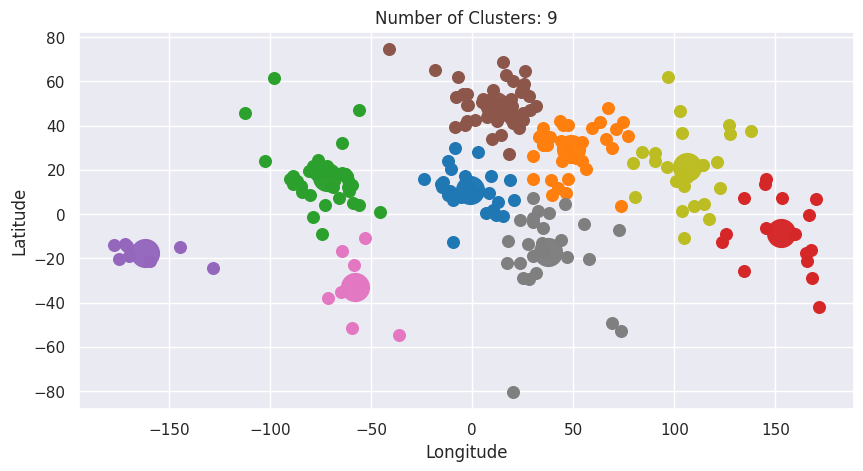

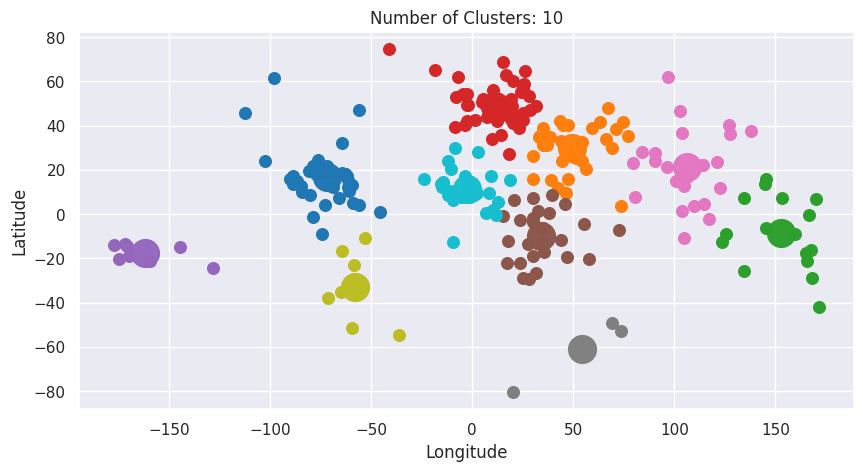

In [13]:
# K-Means Clustering
from scipy.spatial.distance import cdist
all_data = np.array(data)
data_n = np.delete(all_data, 0, axis=1)

wcss=[] #inertia
distortion = []

list_k = [2,3,4,5,6,7,8,9,10]
from sklearn.cluster import KMeans

#Visualising the clusters
colors_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
def kmeans_plot(i):
  plt.scatter(data_n[y_kmeans==i, 0], data_n[y_kmeans==i, 1], s=70, c= colors_list[i], label ='Cluster'+str(i+1))
  plt.scatter(x = center_of_clusters[i, 0], y = center_of_clusters[i, 1], c = colors_list[i], s = 400, alpha = 0.98)  

for k in list_k:  
  kmeans = KMeans(n_clusters=k,).fit(data_n)
  center_of_clusters = kmeans.cluster_centers_
  #print(kmeans.labels_)
  wcss.append(kmeans.inertia_)
  distortion.append(sum(np.min(cdist(data_n, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data_n.shape[0])
  y_kmeans = kmeans.predict(data_n)
  plt.figure(figsize=(10, 5), dpi=100)
  plt.title("Number of Clusters: {}".format(k))
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  for i in range(k):
    kmeans_plot(i)

Ans to Ques. 2: K-means clustering has been applied on the dataset and the plots have been shown for k = 1,2,3,...,10. Each cluster is represnted with a different color and the cluster center is shown with a bigger dot of the same color.

In [7]:
print(wcss)

[657012.0797586325, 325235.52237055893, 256573.086759343, 192356.48001889366, 152244.93717281363, 127560.17498392079, 102873.25264457408, 84927.05022223276, 77545.33088816263]


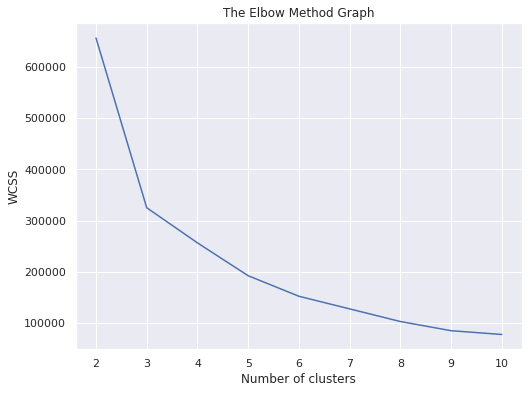

In [8]:
#Elbow Method for K Means Clustering
plt.figure(figsize=(8, 6))
plt.plot(range(2,max(list_k)+1),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

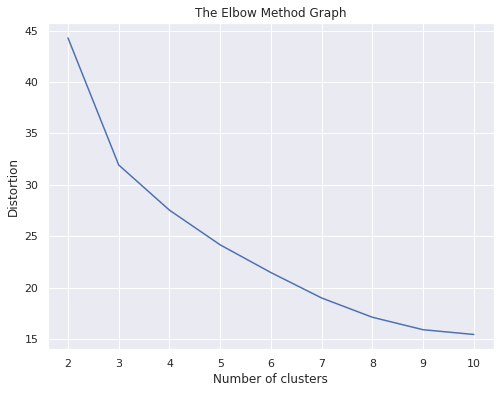

In [9]:
#Elbow Method for K Means Clustering
plt.figure(figsize=(8, 6))
plt.plot(range(2,max(list_k)+1),distortion)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**Ans to Ques.3:** We have plotted two curves- (i) Inertia/WCSS vs Number of clusters and (ii) Distortion vs Number of clusters. To determine the optimal number of clusters in K-means clustering the elbow method is used. Usually, the point after which the error becomes almost flat that is chosen as the optimal number of clusters. If we consider it in this way, then the error never becomes flat but the change is slow after 5. So we can choose 5 as an optimal number of clusters. However, as the name suggests to detect elbow, another popular practice is to choose the number after which the change in error is linear. Following this practice, we can choose 3 as the optimal number of clusters. So, for this problem we can choose 3 or 5 as the optimal number of clusters but it can not clearly said which one is more suitable.  

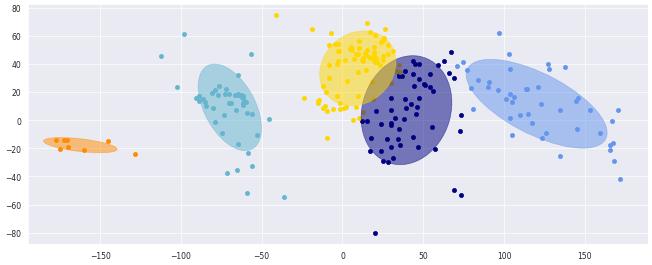

In [10]:
#Clustering with GMM
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture

color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])

plt.figure(figsize=(16, 14), dpi=50)
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type="full", random_state=42).fit(data_n)
plot_results(data_n, gmm.predict(data_n), gmm.means_, gmm.covariances_, 0, "Gaussian Mixture")


In [11]:
for i in range(5):
  print(f"\nFor cluster-{i}")
  print("GMM Means: \n", gmm.means_[i])
  print("GMM Co-varianes: \n", gmm.covariances_[i])


For cluster-0
GMM Means: 
 [39.62000538  7.13999467]
GMM Co-varianes: 
 [[394.16897632  74.79758607]
 [ 74.79758607 749.74584544]]

For cluster-1
GMM Means: 
 [-69.70250092   9.15310869]
GMM Co-varianes: 
 [[ 192.09460898 -144.98104801]
 [-144.98104801  473.25250364]]

For cluster-2
GMM Means: 
 [120.1976526   11.67887377]
GMM Co-varianes: 
 [[ 951.67101881 -450.44541725]
 [-450.44541725  497.99457967]]

For cluster-3
GMM Means: 
 [ 9.48522137 36.86621413]
GMM Co-varianes: 
 [[278.13911392  50.44129835]
 [ 50.44129835 354.15728276]]

For cluster-4
GMM Means: 
 [-162.24003503  -17.71618921]
GMM Co-varianes: 
 [[259.01840942 -33.00978988]
 [-33.00978988  14.57255765]]


In [12]:
#Determine loglikelihood for a sample belonging to each gaussian
s = np.random.randint(240) # a random sample
sample1 = data_n[s,:]
sample1_dense = []
print(f"Random sample, {country[s]} {data_n[s,:]}: " )
for i in range(5):
  cov_inv = np.linalg.inv(gmm.covariances_[i])
  attr = np.exp(-0.5 *np.matmul((sample1.T - gmm.means_[i].T).T,np.matmul(cov_inv,(sample1.T - gmm.means_[i].T))))
  x = gmm.weights_[i]*attr/((2*np.pi)*np.sqrt(np.linalg.det(gmm.covariances_[i])))
  sample1_dense.append(x)
  print(f"  The log-likelihood of belonging to cluster {i} is: {np.log(x)}")  
print(f"The maximum log-likelihood is for cluster: {np.argmax(np.array(sample1_dense))}")
print(f"The GMM model predicted the sample belonging to cluster: { gmm.predict(sample1.reshape(1,2)).item()}")

Random sample, Mexico [-102.5234517 23.94753724]: 
  The log-likelihood of belonging to cluster 0 is: -36.45735602558304
  The log-likelihood of belonging to cluster 1 is: -11.88985451267766
  The log-likelihood of belonging to cluster 2 is: -51.09654991443696
  The log-likelihood of belonging to cluster 3 is: -31.33683097063936
  The log-likelihood of belonging to cluster 4 is: -133.18851035371483
The maximum log-likelihood is for cluster: 1
The GMM model predicted the sample belonging to cluster: 1


Ans to Ques. 4: Gaussuan Mixture Modeling has been applied with 5 Gaussians, the plot is shown above. The mean and co-variance matrix (type-full) are printed above. As can be seen from the figure, the data has been structured into 5 clusters which are represented with 5 different colors. The clusters have different means and co-variance matrices. The mean for each cluatser is a two-dimensional vector which represnts the mean of that cluster for the two dimenional features- latitude(y-axis) and longitude(x-axis). The co-variance matrix for each cluster is 2x2 matrix where diagonal elements represent variance of the two dimensional features and the off-diagonal elements represent the co-relation of the feautures. If we compare this with K-Means clustering, the k-means clustering uses spheres to cluster data and it does not capture the co-relation between features. Also, in k-means clustering, the clusters are non-overlapping, whereas in GMM, we can have overlapping clusters.

Then, for a random sample of the dataset, we determined the loglikelihood for belonging to each cluster as shown in the above cell. The maximum loglikelihood is the cluster where the sample belongs. As you can see, it matches with the prediction of the GMM model.
